In [2]:
import pandas as pd
import json
import data_preprocessing_final
import sklearn as sk
import numpy as np

In [14]:
csv_file_path = 'prepared_dataset.csv'
json_file_path = 'fritz_daten.json'



def csv_to_json(csv_file_path, json_file_path):
    # Read the CSV data
    df = pd.read_csv(csv_file_path)

    # Convert the CSV data to JSON
    json_data = df.to_json(orient='records')
    
    with open(json_file_path, 'w') as json_file:
        json_file.write(json_data)
    
csv_to_json(csv_file_path, json_file_path)


In [30]:
def csv_to_dataset_list(path, size_of_a_dataset):

    ds_rcsv = pd.read_csv(path)
    ds_rcsv.drop(['Unnamed: 0'], axis=1, inplace=True)
    ds_rcsv.info()

    # try to split dataframe to dataframe array
    number_of_datasets = int(len(ds_rcsv)/size_of_a_dataset)
    ds_buff = np.split(ds_rcsv, number_of_datasets, axis=0)

    # reset the index to 0...period for all datasets
    # also search for errors in the imported datasets
    idxs = 0
    bugs = 0
    for dset in ds_buff:
        dset.reset_index(drop=True, inplace=True)
        if len(dset) != size_of_a_dataset:
            print("Error in dataset: Period length not valid! Check dataset number: {:d} \n Expected length = {:d} , Found length = {:d} .".format(
                idxs, size_of_a_dataset, len(dset)))
            bugs += 1
        idxs += 1

    if bugs == 0:
        print("Data imported without any errors!\n ##### Information: ####\n Imported datasets: {:d}".format(
            number_of_datasets))
    else:
        print("Errors while data import!\n See error message(s) above for more.")
    return ds_buff

hallo = csv_to_dataset_list('prepared_dataset.csv', 101)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268357 entries, 0 to 268356
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  268357 non-null  int64  
 1   label      268357 non-null  int64  
 2   acc_x      268357 non-null  float64
 3   acc_y      268357 non-null  float64
 4   acc_z      268357 non-null  float64
 5   gyr_x      268357 non-null  float64
 6   gyr_y      268357 non-null  float64
 7   gyr_z      268357 non-null  float64
 8   quan_x     268357 non-null  float64
 9   quan_y     268357 non-null  float64
 10  quan_z     268357 non-null  float64
 11  r_acc      268357 non-null  float64
 12  r_gyr      268357 non-null  float64
 13  r_quan     268357 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 28.7 MB


C:\Users\fiete\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data imported without any errors!
 ##### Information: ####
 Imported datasets: 2657


In [44]:
with open('json_dataset(5).json', 'r') as f:
    dsds = json.load(f)


In [50]:


periodLengthMS = 1000
sampleRateUS = 10000

"""
with open('json_dataset(5).json', 'r') as f:
    dsds = json.load(f)



with open('fritz_daten.json', 'r') as f:
    dsds = json.load(f)
"""



ds = data_preprocessing_final.jsonData_to_dataset_in_timedifference_us(dsds)


df_new = data_preprocessing_final.normate_dataset_period(periodLengthMS, sampleRateUS, ds)



Starting new normalization/interpolation...
progress: 0.04 %
progress: 0.08 %
progress: 0.11 %
progress: 0.15 %
progress: 0.19 %
progress: 0.23 %
progress: 0.26 %
progress: 0.30 %
progress: 0.34 %
progress: 0.38 %
progress: 0.41 %
progress: 0.45 %
progress: 0.49 %
progress: 0.53 %
progress: 0.56 %
progress: 0.60 %
progress: 0.64 %
progress: 0.68 %
progress: 0.72 %
progress: 0.75 %
progress: 0.79 %
progress: 0.83 %
progress: 0.87 %
progress: 0.90 %
progress: 0.94 %
progress: 0.98 %
progress: 1.02 %
progress: 1.05 %
progress: 1.09 %
progress: 1.13 %
progress: 1.17 %
progress: 1.20 %
progress: 1.24 %
progress: 1.28 %
progress: 1.32 %
progress: 1.35 %
progress: 1.39 %
progress: 1.43 %
progress: 1.47 %
progress: 1.51 %
progress: 1.54 %
progress: 1.58 %
progress: 1.62 %
progress: 1.66 %
progress: 1.69 %
progress: 1.73 %
progress: 1.77 %
progress: 1.81 %
progress: 1.84 %
progress: 1.88 %
progress: 1.92 %
progress: 1.96 %
progress: 1.99 %
progress: 2.03 %
progress: 2.07 %
progress: 2.11 %
prog

In [51]:
df_new

AttributeError: 'list' object has no attribute 'shape'

[{'loggingTime(txt)': '2024-08-26T20:26:56.936+02:00',
  'locationTimestamp_since1970(s)': 1724696813.515029,
  'locationLatitude(WGS84)': 53.626528857,
  'locationLongitude(WGS84)': 10.6714891834,
  'locationAltitude(m)': 14.54954,
  'locationSpeed(m/s)': -1.0,
  'locationSpeedAccuracy(m/s)': -1.0,
  'locationCourse(°)': -1,
  'locationCourseAccuracy(°)': -1,
  'locationVerticalAccuracy(m)': 16.9847984314,
  'locationHorizontalAccuracy(m)': 6.0434989132,
  'locationFloor(Z)': -9999,
  'accelerometerTimestamp_sinceReboot(s)': 4484.2728011667,
  'accelerometerAccelerationX(G)': 0.0058441162,
  'accelerometerAccelerationY(G)': -0.5299377441,
  'accelerometerAccelerationZ(G)': -0.8653411865,
  'motionTimestamp_sinceReboot(s)': 4484.2678161667,
  'motionYaw(rad)': -0.5659377058,
  'motionRoll(rad)': -0.063300336,
  'motionPitch(rad)': 0.5736581734,
  'motionRotationRateX(rad/s)': 0.1551537663,
  'motionRotationRateY(rad/s)': 0.1535040885,
  'motionRotationRateZ(rad/s)': -0.1220260262,
  'm

In [198]:
import random

In [289]:
df_list = pd.DataFrame({'idx': range(len(df_new)), 'dfs': df_new})['dfs'].values.tolist()

In [260]:
random.shuffle(df_list)

In [290]:
x_train,y_train = [],[]

for df in df_list:
    y_train.append(df["label"].iloc[0])
    #x_train.append(df.drop(columns=["timestamp", "label", "acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z", "quan_x", "quan_y", "quan_z"]).values)
    x_train.append(df.drop(columns=["timestamp", "label"]).values)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape, y_train.shape

((2657, 101, 12), (2657,))

In [291]:
_label = ['Gerade', 'Kinnhaken', 'Kopfhaken']
category_to_num = {element: num for num, element in enumerate(_label)}
numerical_data = np.vectorize(category_to_num.get)(y_train)


y_train  = np.array(numerical_data)

In [292]:
x_train = np.mean(x_train, axis=1, keepdims=False)

In [264]:
len(x_train)

2657

In [293]:
params = 2654

x_train_nospillover = x_train[:params]
x_train = x_train[params:]

y_train_nospillover = y_train[:params]
y_train = y_train[params:]


In [294]:
len(x_train_nospillover)

2654

In [295]:
print(np.unique(y_train, return_counts=True))

(array([1]), array([3], dtype=int64))


In [296]:
y_train

array([1, 1, 1])

In [ ]:
df_first_part = df.iloc[:first_part_size]
df_second_part = df.iloc[first_part_size:first_part_size + second_part_size]

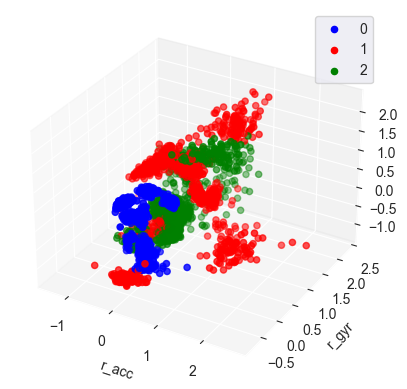

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extracting the required columns and labels
x_coords = []
y_coords = []
z_coords = []
labels = []

for element in x_train:
    x_coords.append(element[0])
    
for element in x_train:
    y_coords.append(element[1])

for element in x_train:
    z_coords.append(element[2])
   




labels = y_train

# Mapping labels to colors
label_to_color = {0: 'blue', 1: 'red', 2: 'green'}
colors = [label_to_color[label] for label in labels]


import numpy as np



# Plotting

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='white')

scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors)

# Creating a legend
legend_labels = list(label_to_color.keys())
legend_colors = [label_to_color[label] for label in legend_labels]
for color, label in zip(legend_colors, legend_labels):
    ax.scatter([], [], [], c=color, label=label)
ax.legend()

ax.set_xlabel('r_acc')
ax.set_ylabel('r_gyr')
ax.set_zlabel('r_quan')

#ax.set_xlim(-2, 1)
#ax.set_ylim(0, 1.5)


plt.show()



In [61]:


x_train_series = pd.DataFrame(list(x_train))
y_train_series = np.array(list(y_train))
# Convert to numeric if necessary




In [62]:
reduced_frame_by_tsfresh = tsfresh.feature_selection.selection.select_features(x_train_series, y_train_series)

In [130]:
from sklearn.model_selection import train_test_split

sk_X_train, sk_X_test, sk_y_train, sk_y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=70)

In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

randomforest = RandomForestClassifier(n_estimators=100, random_state=90)

# Modell trainieren


# Vorhersagen auf dem Testset machen



In [298]:
randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=90)

s
Accuracy: 0.3538055764883195


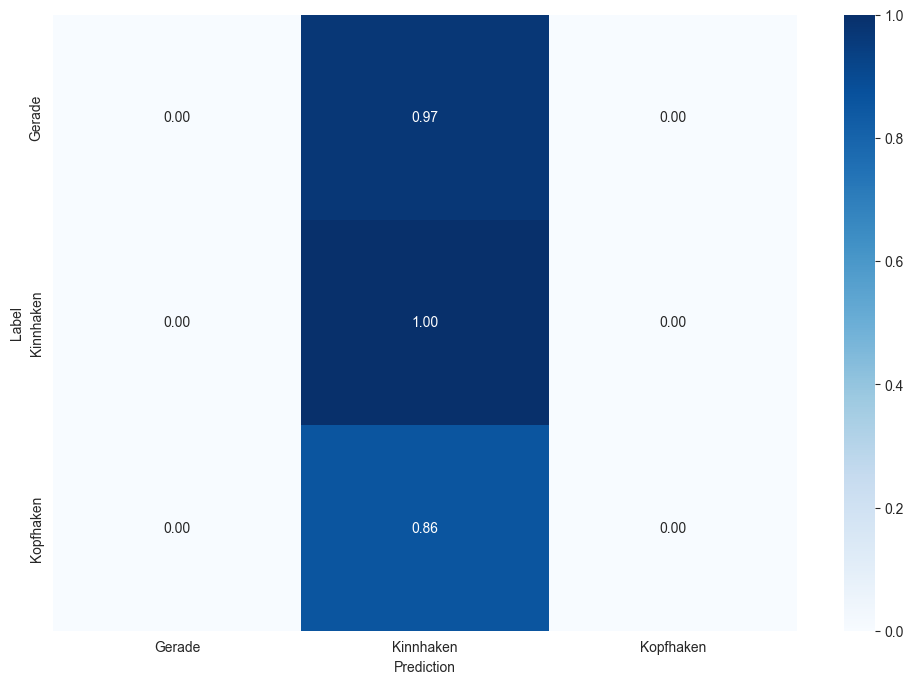

In [299]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


y_pred = randomforest.predict(x_train_nospillover)

print("s")
# Genauigkeit des Modells berechnen
accuracy = accuracy_score(y_train_nospillover, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_train_nospillover, y_pred)

column_sums = conf_matrix.sum(axis=-1)
conf_matrix = conf_matrix / column_sums


CLASSES = ['Gerade', 'Kinnhaken', 'Kopfhaken']
fig = plt.figure()
fig.set_size_inches(12, 8)
sns.heatmap(conf_matrix, xticklabels=CLASSES, yticklabels=CLASSES, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()